In [10]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("Netflix Dataset.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (7789, 11)

Columns:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [11]:
df = pd.read_csv("Netflix Dataset.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (7789, 11)

Columns:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [17]:
df.drop_duplicates(inplace=True)

# Fill missing values where possible
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from Release_Date
df['Year_Released'] = df['Release_Date'].dt.year


/tmp/ipython-input-480297746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='pastel')


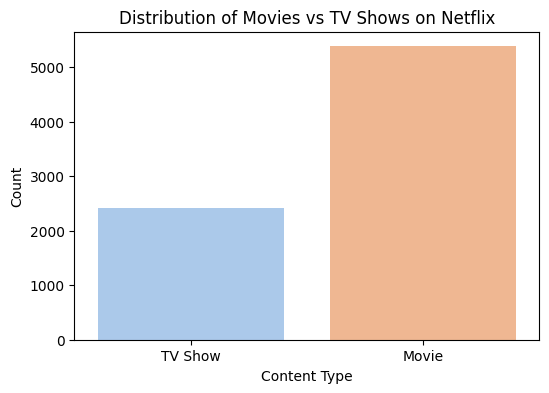

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='pastel')
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


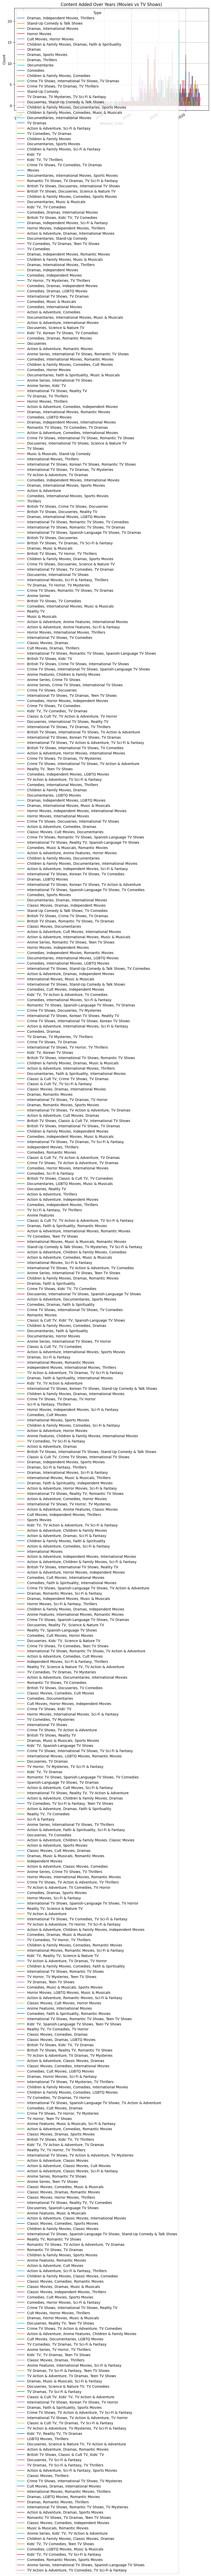

In [22]:
type_trend = df.groupby(['Release_Date', 'Type']).size().unstack().fillna(0)
type_trend.plot(kind='line', figsize=(10,6))
plt.title("Content Added Over Years (Movies vs TV Shows)")
plt.xlabel("Release_Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()


/tmp/ipython-input-2215583451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')


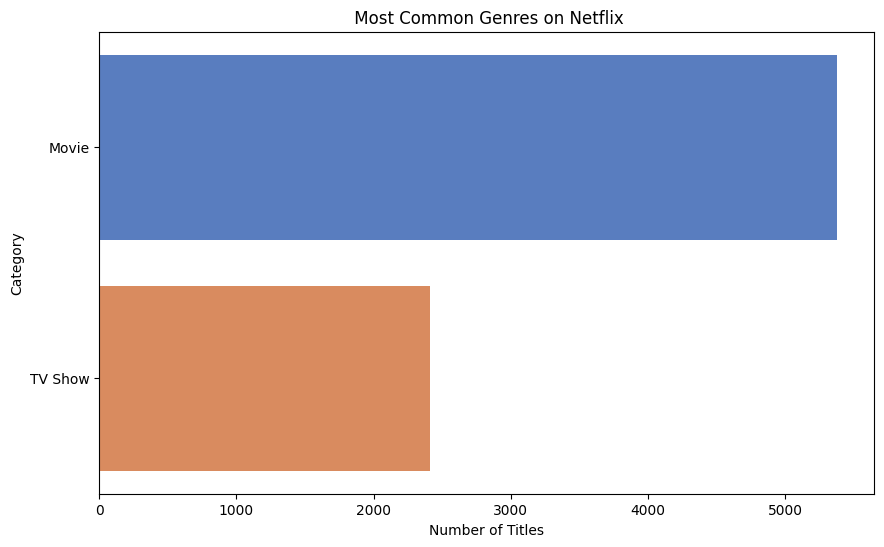

In [26]:
df_genres = df['Category'].dropna().str.split(',').explode().str.strip()
top_genres = df_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title(" Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Category")
plt.show()

/tmp/ipython-input-2644052324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


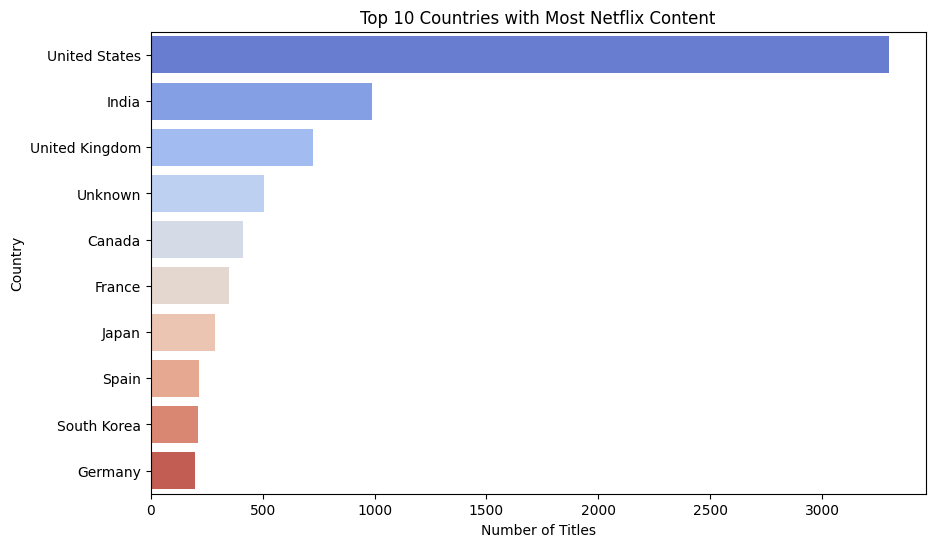

In [28]:
df_countries = df['Country'].dropna().str.split(',').explode().str.strip()
top_countries = df_countries.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [31]:
print("\n--- Summary of Findings ---")
print("1️⃣ Netflix has", df['Type'].value_counts().get('Movie', 0), "Movies and",
      df['Type'].value_counts().get('TV Show', 0), "TV Shows.")
print("2️⃣ Top Genres:\n", top_genres)
print("3️⃣ Top Countries by Content:\n", top_countries)

print("\nAnalysis Complete ✅")


--- Summary of Findings ---
1️⃣ Netflix has 0 Movies and 0 TV Shows.
2️⃣ Top Genres:
 Category
Movie      5377
TV Show    2410
Name: count, dtype: int64
3️⃣ Top Countries by Content:
 Country
United States     3297
India              990
United Kingdom     723
Unknown            507
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Name: count, dtype: int64

Analysis Complete ✅
